In [2]:
# Montar o Drive para acessar a base de dados

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/valmirf/redes_neurais_bcc.git

# **Código da Rede Neural Perceptron**

Abaixo é apresentado um código do perceptron. Prestem atenção nas equações e etapas de treinamento.


##Somatório:



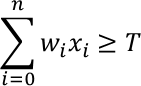


##Atualização dos Pesos:

Δ𝑤_𝑖=𝜂(𝑡−𝑜)𝑥_𝑖

𝑤_(𝑖+1)=𝑤_𝑖+Δ𝑤_𝑖

## Parâmetros:
𝑛 = Número de exemplos

𝑥_𝑖= Vetor de características do exemplo 𝑖

𝑤_𝑖= Peso da conexão 𝑖

𝑇 = Limiar

In [4]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=0.2, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)

    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        #print(summation)
        if summation >= self.threshold:
          activation = 1
        else:
          activation = 0
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label - prediction) * inputs
                #w_(i+1) = w_i + delta
                self.weights += delta


#Exemplo dado em Sala de Aula:

##Operador AND



In [ ]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs)
print(p)
#=> 1

inputs = np.array([0, 1])
p = perceptron.predict(inputs)
print(p)
#=> 0

1
0




---


#Exercícios:

1. Altere o código abaixo para o operador XOR. Deixe os parâmetros no padrão. Qual o resultado para [1,1] e [0,1]?



In [ ]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([0, 1, 1, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs)
print(p)
#=> 1 (Deveria ser 0)

inputs = np.array([0, 1])
p = perceptron.predict(inputs)
print(p)
#=> 0 (Deveria ser 1)

1
0



2. Porque o resultado deu errado na questão anterior?

R = Porque a função XOR não é linearmente separável, o perceptron simples consegue aprender apenas problemas linearmente separáveis, como AND e OR. É impossível traçar uma reta que assuma **0** os valores [0, 0] e [1, 1] simultâneamente, assim como não é possível definir **1** para os valores [0, 1] e [1, 0].

Mesmo com o ajuste dos pesos, pelo problema ser não linear, ele não consegue adaptar para encontrar a solução, necessitanto de um Perceptron mais complexo.

3. Atualize a função de ativação do perceptron para a função sigmóide.

OBS: Essa atualização fará o Percetron se transformar na Rede Neural Adaline, que utiliza uma função de ativação contínua ao invés de uma função limiar binária.

In [18]:
import numpy as np

class Perceptron_to_Adaline(object):

    def __init__(self, no_of_inputs, threshold=0.2, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)

    def sigmoid(self, x):
        # Função de ativação sigmoide
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        # Aplicando a função sigmoide ao resultado
        activation = self.sigmoid(summation)
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label - prediction) * inputs
                #w_(i+1) = w_i + delta
                self.weights += delta


In [20]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([0, 1, 1, 0])

perceptron_ada = Perceptron_to_Adaline(2)
perceptron_ada.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron_ada.predict(inputs)
print(p)
#=> 0.5004410452888252 (Classe 0)

inputs = np.array([0, 1])
p = perceptron_ada.predict(inputs)
print(p)
#=> 0.5002205226873089 (Classe 1)

0.5004410452888252
0.5002205226873089


4. Agora, altere o código para que execute a base de dados Diabetes como Entrada. Avalie os hiperparâmetros abaixo nas redes Perceptron e Adaline, e diga a taxa de acerto no conjunto de testes pra cada configuração.
a) Taxa de Aprendizado = 0.01 e Limiar= 0.2
b) Taxa de Aprendizado = 0.1 e Limiar= 0.2
c) Taxa de Aprendizado = 0.01 e Limiar= 0.5
d) Taxa de Aprendizado = 0.1 e Limiar= 0.5


In [8]:
# Neste código vou utilizar o pandas, framework amplamente utilizado pra lidar com dados
import pandas as pd
from sklearn.model_selection import train_test_split


#carrega a base de dados e retorna conjuntos de treinamento e teste
def load_data():
    url = './drive/MyDrive/UFRPE/6º Período/Redes Neurais/Mini Projetos/diabetes.csv'
    df = pd.read_csv(url)
    #remove a ultima coluna (dados)
    data = df[df.columns[:-1]]
    #normaliza os dados
    normalized_data = (data - data.min()) / (data.max() - data.min())
    #retorna a última coluna (rótulos)
    labels = df[df.columns[-1]]
    #separa em conjunto de treinamento e teste com seus respectivos rótulos
    X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.2, random_state=0)

    return X_train, X_test, y_train, y_test

# Função para calcular a precisão de cada Rede
def calculate_accuracy(predictions, labels):
    correct = sum([1 if pred == true else 0 for pred, true in zip(predictions, labels)])
    accuracy = correct / len(labels)
    return accuracy

#chama função que carrega base de dados
training_inputs, test_inputs, training_labels, test_labels = load_data()


# Letra A
Aprendizado = 0.01 e Limiar= 0.2

In [14]:
#Treina Perceptron
perceptron = Perceptron(8)
perceptron.train(training_inputs.values, training_labels.values)

#Treina Adaline
perceptron_ada = Perceptron_to_Adaline(8)
perceptron_ada.train(training_inputs.values, training_labels.values)

# Avaliação em toda a base de testes

# Perceptron Simples
simple_predictions = [perceptron.predict(row.values) for _, row in test_inputs.iterrows()]
simple_accuracy = calculate_accuracy(simple_predictions, test_labels.values)

# Adaline (Limiar aplicado após treinamento)
threshold = 0.2

adaline_predictions = [1 if perceptron_ada.predict(row.values) >= threshold else 0 for _, row in test_inputs.iterrows()]
adaline_accuracy = calculate_accuracy(adaline_predictions, test_labels.values)

# Exibição dos resultados
print("Accuracy (Perceptron Simples):", simple_accuracy)
print("Accuracy (Adaline):", adaline_accuracy)

# Comparação amostra a amostra
print("\nComparison:")
for i, (simple_pred, adaline_pred, true_label) in enumerate(zip(simple_predictions, adaline_predictions, test_labels.values)):
    print(f"Sample {i+1}: Perceptron={simple_pred}, Adaline={adaline_pred}, Label={true_label}")

Accuracy (Perceptron Simples): 0.7467532467532467
Accuracy (Adaline): 0.38311688311688313

Comparison:
Sample 1: Perceptron=1, Adaline=1, Label=1
Sample 2: Perceptron=0, Adaline=1, Label=0
Sample 3: Perceptron=1, Adaline=1, Label=1
Sample 4: Perceptron=0, Adaline=1, Label=1
Sample 5: Perceptron=0, Adaline=1, Label=0
Sample 6: Perceptron=0, Adaline=1, Label=0
Sample 7: Perceptron=1, Adaline=1, Label=1
Sample 8: Perceptron=0, Adaline=1, Label=0
Sample 9: Perceptron=0, Adaline=1, Label=0
Sample 10: Perceptron=0, Adaline=1, Label=0
Sample 11: Perceptron=0, Adaline=1, Label=0
Sample 12: Perceptron=0, Adaline=1, Label=0
Sample 13: Perceptron=0, Adaline=1, Label=0
Sample 14: Perceptron=0, Adaline=1, Label=0
Sample 15: Perceptron=0, Adaline=1, Label=0
Sample 16: Perceptron=0, Adaline=1, Label=0
Sample 17: Perceptron=0, Adaline=1, Label=0
Sample 18: Perceptron=1, Adaline=1, Label=1
Sample 19: Perceptron=1, Adaline=1, Label=1
Sample 20: Perceptron=0, Adaline=1, Label=1
Sample 21: Perceptron=0, A

# Letra B
Aprendizado = 0.1 e Limiar= 0.2

In [15]:
#Treina Perceptron
perceptron = Perceptron(8, learning_rate=0.1)
perceptron.train(training_inputs.values, training_labels.values)

#Treina Adaline
perceptron_ada = Perceptron_to_Adaline(8, learning_rate=0.1)
perceptron_ada.train(training_inputs.values, training_labels.values)

# Avaliação em toda a base de testes

# Perceptron Simples
simple_predictions = [perceptron.predict(row.values) for _, row in test_inputs.iterrows()]
simple_accuracy = calculate_accuracy(simple_predictions, test_labels.values)

# Adaline (Limiar aplicado após treinamento)
threshold = 0.2

adaline_predictions = [1 if perceptron_ada.predict(row.values) >= threshold else 0 for _, row in test_inputs.iterrows()]
adaline_accuracy = calculate_accuracy(adaline_predictions, test_labels.values)

# Exibição dos resultados
print("Accuracy (Perceptron Simples):", simple_accuracy)
print("Accuracy (Adaline):", adaline_accuracy)

# Comparação amostra a amostra
print("\nComparison:")
for i, (simple_pred, adaline_pred, true_label) in enumerate(zip(simple_predictions, adaline_predictions, test_labels.values)):
    print(f"Sample {i+1}: Perceptron={simple_pred}, Adaline={adaline_pred}, Label={true_label}")

Accuracy (Perceptron Simples): 0.7272727272727273
Accuracy (Adaline): 0.38311688311688313

Comparison:
Sample 1: Perceptron=0, Adaline=1, Label=1
Sample 2: Perceptron=0, Adaline=1, Label=0
Sample 3: Perceptron=1, Adaline=1, Label=1
Sample 4: Perceptron=1, Adaline=1, Label=1
Sample 5: Perceptron=0, Adaline=1, Label=0
Sample 6: Perceptron=0, Adaline=1, Label=0
Sample 7: Perceptron=1, Adaline=1, Label=1
Sample 8: Perceptron=0, Adaline=1, Label=0
Sample 9: Perceptron=0, Adaline=1, Label=0
Sample 10: Perceptron=0, Adaline=1, Label=0
Sample 11: Perceptron=0, Adaline=1, Label=0
Sample 12: Perceptron=0, Adaline=1, Label=0
Sample 13: Perceptron=0, Adaline=1, Label=0
Sample 14: Perceptron=0, Adaline=1, Label=0
Sample 15: Perceptron=0, Adaline=1, Label=0
Sample 16: Perceptron=0, Adaline=1, Label=0
Sample 17: Perceptron=0, Adaline=1, Label=0
Sample 18: Perceptron=1, Adaline=1, Label=1
Sample 19: Perceptron=0, Adaline=1, Label=1
Sample 20: Perceptron=0, Adaline=1, Label=1
Sample 21: Perceptron=0, A

# Letra C
Aprendizado = 0.01 e Limiar= 0.5

In [16]:
#Treina Perceptron
perceptron = Perceptron(8, threshold=0.5)
perceptron.train(training_inputs.values, training_labels.values)

#Treina Adaline
perceptron_ada = Perceptron_to_Adaline(8, learning_rate=0.01)
perceptron_ada.train(training_inputs.values, training_labels.values)

# Avaliação em toda a base de testes

# Perceptron Simples
simple_predictions = [perceptron.predict(row.values) for _, row in test_inputs.iterrows()]
simple_accuracy = calculate_accuracy(simple_predictions, test_labels.values)

# Adaline (Limiar aplicado após treinamento)
threshold = 0.5

adaline_predictions = [1 if perceptron_ada.predict(row.values) >= threshold else 0 for _, row in test_inputs.iterrows()]
adaline_accuracy = calculate_accuracy(adaline_predictions, test_labels.values)

# Exibição dos resultados
print("Accuracy (Perceptron Simples):", simple_accuracy)
print("Accuracy (Adaline):", adaline_accuracy)

# Comparação amostra a amostra
print("\nComparison:")
for i, (simple_pred, adaline_pred, true_label) in enumerate(zip(simple_predictions, adaline_predictions, test_labels.values)):
    print(f"Sample {i+1}: Perceptron={simple_pred}, Adaline={adaline_pred}, Label={true_label}")

Accuracy (Perceptron Simples): 0.7662337662337663
Accuracy (Adaline): 0.7272727272727273

Comparison:
Sample 1: Perceptron=1, Adaline=0, Label=1
Sample 2: Perceptron=0, Adaline=0, Label=0
Sample 3: Perceptron=1, Adaline=1, Label=1
Sample 4: Perceptron=0, Adaline=1, Label=1
Sample 5: Perceptron=0, Adaline=0, Label=0
Sample 6: Perceptron=0, Adaline=0, Label=0
Sample 7: Perceptron=1, Adaline=0, Label=1
Sample 8: Perceptron=0, Adaline=1, Label=0
Sample 9: Perceptron=0, Adaline=1, Label=0
Sample 10: Perceptron=0, Adaline=0, Label=0
Sample 11: Perceptron=0, Adaline=0, Label=0
Sample 12: Perceptron=0, Adaline=0, Label=0
Sample 13: Perceptron=0, Adaline=0, Label=0
Sample 14: Perceptron=0, Adaline=0, Label=0
Sample 15: Perceptron=0, Adaline=0, Label=0
Sample 16: Perceptron=0, Adaline=0, Label=0
Sample 17: Perceptron=0, Adaline=0, Label=0
Sample 18: Perceptron=1, Adaline=1, Label=1
Sample 19: Perceptron=1, Adaline=0, Label=1
Sample 20: Perceptron=0, Adaline=0, Label=1
Sample 21: Perceptron=0, Ad

# Letra D
Aprendizado = 0.1 e Limiar= 0.5

In [17]:
#Treina Perceptron
perceptron = Perceptron(8, threshold=0.5, learning_rate=0.1)
perceptron.train(training_inputs.values, training_labels.values)

#Treina Adaline
# Chama função adaline
perceptron_ada = Perceptron_to_Adaline(8, threshold=0.5, learning_rate=0.01)
perceptron_ada.train(training_inputs.values, training_labels.values)

# Avaliação em toda a base de testes

# Perceptron Simples
simple_predictions = [perceptron.predict(row.values) for _, row in test_inputs.iterrows()]
simple_accuracy = calculate_accuracy(simple_predictions, test_labels.values)

# Adaline (Limiar aplicado após treinamento)
threshold = 0.5

adaline_predictions = [1 if perceptron_ada.predict(row.values) >= threshold else 0 for _, row in test_inputs.iterrows()]
adaline_accuracy = calculate_accuracy(adaline_predictions, test_labels.values)

# Exibição dos resultados
print("Accuracy (Perceptron Simples):", simple_accuracy)
print("Accuracy (Adaline):", adaline_accuracy)

# Comparação amostra a amostra
print("\nComparison:")
for i, (simple_pred, adaline_pred, true_label) in enumerate(zip(simple_predictions, adaline_predictions, test_labels.values)):
    print(f"Sample {i+1}: Perceptron={simple_pred}, Adaline={adaline_pred}, Label={true_label}")

Accuracy (Perceptron Simples): 0.7467532467532467
Accuracy (Adaline): 0.7272727272727273

Comparison:
Sample 1: Perceptron=0, Adaline=0, Label=1
Sample 2: Perceptron=0, Adaline=0, Label=0
Sample 3: Perceptron=0, Adaline=1, Label=1
Sample 4: Perceptron=0, Adaline=1, Label=1
Sample 5: Perceptron=0, Adaline=0, Label=0
Sample 6: Perceptron=0, Adaline=0, Label=0
Sample 7: Perceptron=1, Adaline=0, Label=1
Sample 8: Perceptron=0, Adaline=1, Label=0
Sample 9: Perceptron=0, Adaline=1, Label=0
Sample 10: Perceptron=0, Adaline=0, Label=0
Sample 11: Perceptron=0, Adaline=0, Label=0
Sample 12: Perceptron=0, Adaline=0, Label=0
Sample 13: Perceptron=0, Adaline=0, Label=0
Sample 14: Perceptron=0, Adaline=0, Label=0
Sample 15: Perceptron=0, Adaline=0, Label=0
Sample 16: Perceptron=0, Adaline=0, Label=0
Sample 17: Perceptron=0, Adaline=0, Label=0
Sample 18: Perceptron=1, Adaline=1, Label=1
Sample 19: Perceptron=0, Adaline=0, Label=1
Sample 20: Perceptron=0, Adaline=0, Label=1
Sample 21: Perceptron=0, Ad